In [211]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

Step 1:  collect 10 images of faces (training faces) 

In [212]:
faces_folder = 'faces'
face_files = os.listdir(faces_folder)

Step 2:  resize the image to 50 x 50.

Step 3:  convert the images to gray scale images.

In [213]:
training_images = []
for file in face_files:
    image = cv2.imread(os.path.join(faces_folder, file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(image, (50, 50))
    training_images.append(resized_image)

Step 4: for each image, get the pixels values. Now you will have 50 x 50 pixels.

In [214]:
face_pixels = np.array([image.flatten() for image in training_images])

Step 5:  represent every image I as a vector T.

In [215]:
face_vectors = np.array(face_pixels).T

Step 6:  compute the face vectors i.e. form a matrix that have each image vector in each 
column and compute the mean face. Display that face.

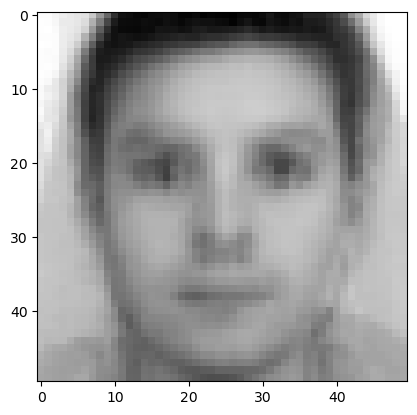

In [216]:
mean_face = np.mean(face_vectors, axis=1)
mean_face_image = np.reshape(mean_face, (50, 50))
plt.imshow(mean_face_image, cmap = 'gray')

Step 7:  Subtract the average face vector from the face vectors.

In [217]:
centered_face_vectors = face_vectors - mean_face[:, np.newaxis]

Step 8:  Calculate the covariance matrix, which results in n x n matrix.

In [218]:
covariance_matrix = np.cov(centered_face_vectors)

Step 9:  Calculate the eigenvalues and eigenvectors from the covariance matrix.

In [219]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

Step 10: Choose the K best eigenvectors from step-9.

In [220]:
k = 5
eigenvectors_k = eigenvectors[:, :k]

Step 11:  multiply each eigenvalues i.e. eigen vectors with the (face vector -average face 
vector) i.e. step-7

In [221]:
projected_faces = np.dot(eigenvectors_k.T, centered_face_vectors)
projected_faces

array([[-3926.48010956+0.j,  1608.79542224+0.j,  -422.61181658+0.j,
         -890.26226706+0.j, -3626.0481857 +0.j,  2226.83916062+0.j,
          648.05672796+0.j,   898.44427257+0.j,  1442.31218591+0.j,
         2040.9546096 +0.j],
       [ -924.24110592+0.j,  -455.3023472 +0.j,   123.48544505+0.j,
         2631.69192309+0.j,  -802.83130005+0.j, -1069.27578042+0.j,
          905.06758307+0.j,   571.26686249+0.j,   219.45911987+0.j,
        -1199.32039998+0.j],
       [  704.38217966+0.j,    18.40912684+0.j, -2085.58844303+0.j,
          133.63284124+0.j,  -131.28544229+0.j,   -34.08147687+0.j,
          680.40019953+0.j,   113.03417292+0.j,   327.00241895+0.j,
          274.09442305+0.j],
       [  171.03708926+0.j,   505.81035593+0.j,  -169.28423285+0.j,
          278.22156232+0.j,  -239.41802292+0.j,  -559.66209371+0.j,
         -790.45036246+0.j,  1207.06305139+0.j, -1107.5782927 +0.j,
          704.26094575+0.j],
       [  262.05075671+0.j,  -106.72314175+0.j,   -99.50609393+0.j,


Step 12:  graphically display each face with respect to the eigenvalues.

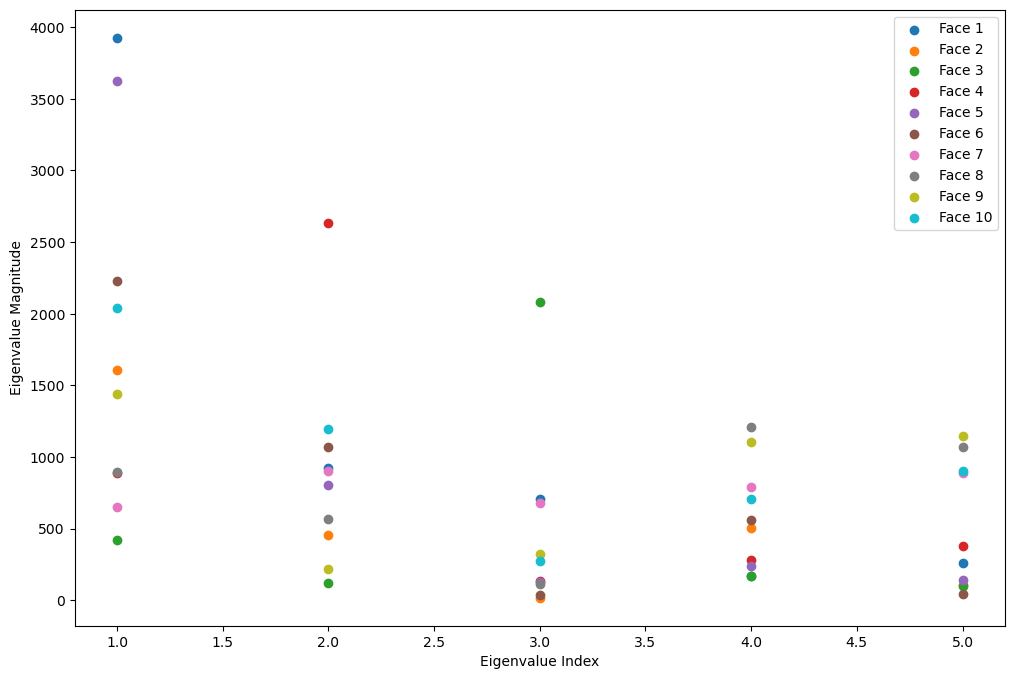

In [222]:
plt.figure(figsize=(12, 8))
for i in range(len(training_images)):
    projected_face = np.abs(projected_faces[:, i])
    # Plot eigenvalue magnitudes vs. eigenvalue indices
    plt.scatter(np.arange(1, k+1), projected_face, label=f"Face {i+1}")
    
plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue Magnitude")
plt.legend()
plt.show()

Step 13:  read the test image and separate the face from the image. If you already have 
a separated face image i.e. image which have a face centered and resized to 50 x 50, you 
can skip Step-13.

In [223]:
test_image = cv2.imread('test.jpeg')
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
resized_test_image = cv2.resize(gray_test_image, (50, 50))

Step 14:  calculate the feature vector of the test face and subtract it with the average 
face.

In [224]:
test_pixels = np.array(resized_test_image).flatten()
test_vector = test_pixels - mean_face

Step 15: project the test image on the eigenspace.

In [225]:
projected_test_face = np.dot(eigenfaces.T, test_vector)

Step 16: calculate the Euclidean distance (e) it with each eigenface vectors.

In [226]:
distances = []
for i in range(len(faces_files)):
    distance = np.sqrt(np.sum(projected_faces[:, i] - projected_test_face)**2)
    distances.append(distance)

Step 17: if e < threshold, then it is recognized as face ‘i’ from the training set.  e is called 
the distance within face space.  

In [227]:
threshold = 1000
min_distance_index = np.argmin(distances)
if distances[min_distance_index] < threshold:
    recognized_face = face_files[min_distance_index]
    print("Recognized face is %s" % recognized_face)
else:
    print("Face not recognized.")

Recognized face is 5.jpeg


# Displaying Results

Test Face:


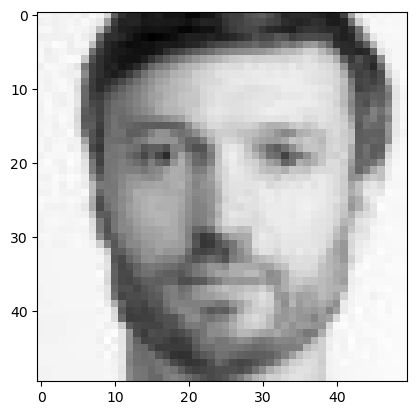

In [228]:
print("Test Face:")
plt.imshow(resized_test_image, cmap='gray')

Recognized Face:


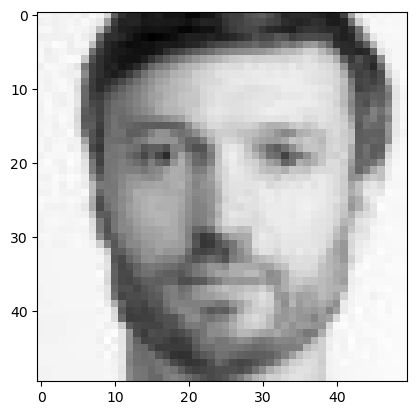

In [229]:
img = cv2.imread('faces/%s' % recognized_face)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (50, 50))
print("Recognized Face:")
plt.imshow(img, cmap='gray')